## Using the Model On Current League

In this fourth and final notebook I'm going to import the 2019 data, clean it, and see how it performs and predicts an actual league, namely: mine. ['What is Nyquist?'](http://fantasy.espn.com/hockey/league/standings?leagueId=56036) is the ESPN league the scoring that's been used throughout has been based on and is a good barometer for most leagues, which makes it a suitable test.

In [1]:
## import working modules
import pandas as pd
import numpy as np
import glob
import os
import unicodedata
from datetime import datetime
from functools import reduce


### Import and Clean

The following subset is repeating the steps of importing and cleaning the Natural Stat Trick data, so it has the same features as the table we built the model on. 

In [2]:
## loop through all the csvs, import them into a dictionary with edicted names
## first read all the csvs as raw files
## important note here, the output files save na values as "-", so those have to be dealt with. 
## you could do it later, but here I'm adding them in

df = [pd.read_csv(f,na_values = '-') for f in glob.glob('*.csv')]

## pull in the names and clean them
names = glob.glob('*.csv')
for i in range(len(names)):
    names[i]= names[i].replace("-","").replace("Natural Stat Trick","").replace(".csv","").replace(" ","")

## zip together for clean mapping and create dictionary
player_data = list(zip(names, df))
player_data_dict = dict(player_data)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
## set index for joining
for key, value in player_data_dict.items():
    value.set_index(['Player','Year','Team'], inplace=True)

    

KeyError: 'Year'

In [4]:
## cleaning up column headers
## all those not recorded here I manually replaced " " with "_" and "%" with "Per" prior to saving
## if not for my meddling with the flat files you wouldn't have to do this, and arguably it's not 
## necissary here, but I prefer it to be more standardized
keys = player_data_dict.keys()
for i in keys:
    player_data_dict[i].columns = player_data_dict[i].columns.str.replace(r" ", "_")
    player_data_dict[i].columns = player_data_dict[i].columns.str.replace(r"%","Per")

player_data_2019 = pd.merge(player_data_dict['PlayerSeasonTotals2019SIndCounts'],player_data_dict['PlayerSeasonTotals2019PPindCounts'], left_index=True, right_index=True, suffixes=("",'_PPIndC'), how='outer').merge(player_data_dict['PlayerSeasonTotals2019PKindCounts'],left_index=True, right_index=True, suffixes=("",'_PkIndC'), how='outer').merge(player_data_dict['PlayerSeasonTotals2019PKOIRates'],left_index=True, right_index=True, suffixes=("",'_PkIndR'), how='outer').merge(player_data_dict['PlayerSeasonTotals2019PPOIRates'],left_index=True, right_index=True, suffixes=("",'_PPIndR'), how='outer').merge(player_data_dict['PlayerSeasonTotals2019SOIRates'],left_index=True, right_index=True, suffixes=("",'_SIndR'), how='outer').merge(player_data_dict['Playerbios2019b'],left_index=True, right_index=True, suffixes=("",'_Bios'), how='outer')


In [5]:
player_data_2019['Draft_Round'].fillna(100,inplace = True)
player_data_2019['Draft_Year'].fillna(1900,inplace = True)
player_data_2019['Round_Pick'].fillna(100,inplace = True)
player_data_2019['Overall_Draft_Position'].fillna(1000,inplace = True)
player_data_2019['Draft_Team'].fillna('Undrafted',inplace = True)
## this is the iteration to return each value
has_na = player_data_2019.isnull().sum() > 0
comb_player_data_cols = player_data_2019.columns[has_na]
comb_player_data_cols_2 = [col for col in player_data_2019.columns if col in comb_player_data_cols]


In [6]:
## these are the count values that I'm filling as zero
fill_zero = ['SHPer_PPIndC','IPP','SHPer','GP_PPIndC','TOI_PPIndC','Goals_PPIndC','Total_Assists_PPIndC','IPP_PPIndC','Shots_PPIndC','GP_PPIndC','TOI_PPIndC','IPP_PPIndC','IPP_PPIndC', 'Shots_PPIndC', 'SHPer_PPIndC', 'iSCF_PPIndC', 'iHDCF_PPIndC', 'Rush_Attempts_PPIndC', 'Rebounds_Created_PPIndC', 'PIM_PPIndC','Total_Penalties_PPIndC', 'Minor_PPIndC', 'Major_PPIndC', 'Misconduct_PPIndC', 'Penalties_Drawn_PPIndC', 'Giveaways_PPIndC', 'Takeaways_PPIndC', 'Hits_PPIndC', 'Hits_Taken_PPIndC', 'Shots_Blocked_PPIndC', 'Faceoffs_Won_PPIndC', 'Faceoffs_Lost_PPIndC','Faceoffs_Per_PPIndC','GP_PkIndC', 'TOI_PkIndC', 'Goals_PkIndC', 'Total_Assists_PkIndC', 'IPP_PkIndC', 'Shots_PkIndC', 'SHPer_PkIndC',    'iSCF_PkIndC', 'iHDCF_PkIndC', 'Rush_Attempts_PkIndC', 'Rebounds_Created_PkIndC', 'PIM_PkIndC', 'Total_Penalties_PkIndC', 'Minor_PkIndC', 'Major_PkIndC', 'Misconduct_PkIndC', 'Penalties_Drawn_PkIndC', 'Giveaways_PkIndC', 'Takeaways_PkIndC', 'Hits_PkIndC', 'Hits_Taken_PkIndC', 'Shots_Blocked_PkIndC', 'Faceoffs_Won_PkIndC', 'Faceoffs_Lost_PkIndC', 'PKTOI', 'PKTOI_GP', 'PKCF_60', 'PKCA_60', 'PKTOI', 'PKTOI_GP', 'PKCF_60', 'PKCA_60','PKFF_60', 'PKFA_60','PKSF_60', 'PKSA_60', 'PKGF_60', 'PKGA_60','PKSCF_60', 'PKSCA_60', 'PKHDCF_60', 'PKHDCA_60',  'PKHDGF_60', 'PKHDGA_60','PKLDCF_60', 'PKLDCA_60',  'PKMDCF_60', 'PKMDCA_60', 'PKMDGF_60', 'PKMDGA_60', 'PKLDGF_60', 'PKLDGA_60',  'PKPDO', 'PKOff.\xa0Zone_Faceoffs_60', 'PKNeu.\xa0Zone_Faceoffs_60', 'PKDef.\xa0Zone_Faceoffs_60', 'PKOnTFStarts_60',     'PKOffZoneFaceoffs_60', 'PKNeuZoneFaceoffs_60', 'PKDefZoneFaceoffs_60',   'PPTOI', 'PPTOI_GP', 'PPCF_60', 'PPCA_60', 'PPFF_60', 'PPFA_60',  'PPSF_60', 'PPSA_60',  'PPGF_60', 'PPGA_60', 'PPSCF_60', 'PPSCA_60','PPHDCF_60', 'PPHDCA_60',  'PPHDGF_60', 'PPHDGA_60',  'PPMDCF_60', 'PPMDCA_60','PPMDGF_60', 'PPMDGA_60',  'PPLDCF_60', 'PPLDCA_60', 'PPLDGF_60', 'PPLDGA_60', 'PPPDO', 'PPOff.\xa0Zone_Faceoffs_60', 'PPNeu.\xa0Zone_Faceoffs_60', 'PPDef.\xa0Zone_Faceoffs_60', 'PPOnTFStarts_60',  'PPOffZoneFaceoffs_60', 'PPNeuZoneFaceoffs_60', 'PPDefZoneFaceoffs_60',  'CFPer', 'FFPer', 'SFPer', 'GFPer', 'SCFPer', 'HDCFPer', 'HDGFPer', 'MDCFPer', 'MDGFPer', 'LDCFPer', 'LDGFPer', 'On-Ice_SHPer', 'On-Ice_SVPer', 'PDO', 'OffZoneStartPer', 'Off.\xa0Zone_Faceoff_Per']

for i in fill_zero:
    player_data_2019[i].fillna(0,inplace = True)
    
## mean values
fill_mean = ['PPLDGFPer', 'PPOn-Ice_SHPer', 'PPOn-Ice_SVPer',  'PPLDCFPer', 'PPMDGFPer','PPMDCFPer', 'PPHDGFPer','PPHDCFPer', 'PPSCFPer','PPGFPer','PPSFPer','PPFFPer','PPCFPer','PKOff.\xa0Zone_Faceoff_Per', 'PKOffZoneStartPer','PKLDGFPer', 'PKOn-Ice_SHPer', 'PKOn-Ice_SVPer','PPOffZoneStartPer','Faceoffs_Per','Faceoffs_Per_PPIndC','Faceoffs_Per_PPIndC','iCF_PPIndC',  'PKMDCFPer', 'PKMDGFPer',  'PKLDCFPer','iFF_PPIndC','iCF_PkIndC', 'iFF_PkIndC','Faceoffs_Per_PkIndC','PKCFPer','PKFFPer','PKSFPer','PKGFPer','PKSCFPer','PKHDCFPer', 'PKHDGFPer','PPOff.\xa0Zone_Faceoff_Per' ]

for i in fill_mean:
    player_data_2019[i].fillna(player_data_2019[i].mean(),inplace = True)

## the drop values
player_data_2019.drop(['Position_PPIndC', 'First_Assists_PPIndC', 'Second_Assists_PPIndC', 'Total_Points_PPIndC', 'Position_PkIndC', 'First_Assists_PkIndC', 'Second_Assists_PkIndC', 'Total_Points_PkIndC', 'Position_PkIndR', 'GP_PkIndR', 'Position_PPIndR', 'GP_PPIndR', 'Birth_State/Province','Position_PPIndR', 'GP_PPIndR','Position_PkIndR', 'GP_PkIndR',  'First_Assists_PkIndC', 'Second_Assists_PkIndC', 'Total_Points_PkIndC', 'Position_PkIndC','First_Assists','Second_Assists','Total_Points','Position_PPIndC','First_Assists_PPIndC', 'Second_Assists_PPIndC', 'Total_Points_PPIndC','Position_PPIndC','Birth_State/Province'], axis=1, inplace=True)
## dropping a few more excess columns I found, just to reduce junk variables
player_data_2019.drop(['GP_PPIndC','GP_PkIndC','Position_SIndR', 'GP_SIndR','Position_Bios'], axis=1, inplace=True)

## checking that all na are gone
has_na = player_data_2019.isnull().sum() > 0
player_data_2019_cols = player_data_2019.columns[has_na]
player_data_2019_cols_3 = [col for col in player_data_2019.columns if col in player_data_2019_cols]
print(player_data_2019_cols_3)

['Age', 'Date_of_Birth', 'Birth_City', 'Birth_Country', 'Nationality', 'Height_(in)', 'Weight_(lbs)']


In [7]:
## since it's only 3 rows I'm just going to drop them here

player_data_2019.dropna(inplace=True)
## checking that all na are gone
has_na = player_data_2019.isnull().sum() > 0
player_data_2019_cols = player_data_2019.columns[has_na]
player_data_2019_cols_3 = [col for col in player_data_2019.columns if col in player_data_2019_cols]
print(player_data_2019_cols_3)

[]


In [8]:
## reset the index so we can use the year column
player_data_2019.reset_index(inplace=True)

## year imported as an int so need to convert that from 2018 into '1-1-2018'
## going to make a mini function here and then iterate row wise
def age_formula(x,y):
    return round((datetime.strptime(str(x), '%Y')-datetime.strptime(str(y), '%Y-%m-%d')).days/365)

player_data_2019['Age'] = player_data_2019.apply(lambda row: age_formula(row['Year'],row['Date_of_Birth']), axis=1)

## checking that it worked
player_data_2019['Age'].loc[player_data_2019['Player'] == 'Zdeno Chara']

901    42
Name: Age, dtype: int64

In [9]:
## creating the fantasy points scoring
player_data_2019['Fantasy Points'] = player_data_2019['Goals']*3+player_data_2019['Total_Assists']*2+player_data_2019['Shots']*0.1+player_data_2019['Hits']*0.25+player_data_2019['Shots_Blocked']*0.5+player_data_2019['Faceoffs_Won']*0.05+player_data_2019['Goals_PPIndC']*3.5+player_data_2019['Total_Assists_PPIndC']*2.25+player_data_2019['Shots_PPIndC']*0.1+player_data_2019['Hits_PPIndC']*0.25+player_data_2019['Shots_Blocked_PPIndC']*0.5+player_data_2019['Faceoffs_Won_PPIndC']*0.05+player_data_2019['Goals_PkIndC']*5+player_data_2019['Total_Assists_PkIndC']*2.25+player_data_2019['Shots_PkIndC']*0.1+player_data_2019['Hits_PkIndC']*0.25+player_data_2019['Shots_Blocked_PkIndC']*0.5+player_data_2019['Faceoffs_Won_PkIndC']*0.05



In [10]:
## cleaning the position tables
player_data_2019['Cleaned_Position'] = player_data_2019['Position'].str[0]
player_data_2019.Cleaned_Position.unique()

array(['L', 'D', 'R', 'C'], dtype=object)

In [11]:
## quick summary stats again
player_data_2019['Position']=player_data_2019['Cleaned_Position']
import researchpy as rp
rp.summary_cont(player_data_2019.groupby("Cleaned_Position")['Fantasy Points'])


,N,Mean,SD,SE,95% Conf.,Interval
Cleaned_Position,,,,,,
C,297,109.213636,84.185828,4.884957,99.622961,118.804312
D,323,87.818731,66.428281,3.696168,80.563000,95.074461
L,153,95.360458,69.853988,5.647360,84.255281,106.465634
R,130,96.961923,76.670827,6.724476,83.730963,110.192883


In [12]:
## One hot encoding the position data
one_hot_p = pd.get_dummies(player_data_2019.Cleaned_Position)
new_player_data_2019 = pd.concat([player_data_2019, one_hot_p], axis=1)
new_player_data_2019

,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,Shots,...,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,Cleaned_Position,C,D,L,R
0,A.J. Greer,2019,COL,L,15,93.800000,1,1,100.00,9,...,COL,2.0,9.0,39.0,13.50,L,0,0,1,0
1,Aaron Ekblad,2019,FLA,D,82,1495.500000,7,15,27.85,126,...,FLA,1.0,1.0,1.0,167.00,D,0,1,0,0
2,Adam Clendening,2019,CBJ,D,4,35.466667,0,0,0.00,3,...,CHI,2.0,6.0,36.0,2.05,D,0,1,0,0
3,Adam Cracknell,2019,ANA,R,2,20.500000,0,0,0.00,3,...,CGY,9.0,21.0,279.0,1.80,R,0,0,0,1
4,Adam Erne,2019,T.B,L,65,629.383333,5,12,60.71,60,...,T.B,2.0,3.0,33.0,106.20,L,0,0,1,0
5,Adam Gaudette,2019,VAN,C,56,530.216667,5,5,58.82,45,...,VAN,5.0,28.0,149.0,61.85,C,1,0,0,0
6,Adam Henrique,2019,ANA,C,82,1008.783333,10,14,64.86,82,...,N.J,3.0,21.0,82.0,190.10,C,1,0,0,0
7,Adam Johnson,2019,PIT,C,6,31.833333,0,2,66.67,3,...,Undrafted,100.0,100.0,1000.0,8.55,C,1,0,0,0
8,Adam Larsson,2019,EDM,D,82,1548.716667,3,14,37.78,109,...,N.J,1.0,4.0,4.0,174.15,D,0,1,0,0
9,Adam Lowry,2019,WPG,C,78,939.950000,10,8,60.00,94,...,WPG,3.0,6.0,67.0,176.75,C,1,0,0,0


In [13]:
## importing the model feature data to repeat the model construction
player_data = pd.read_csv('Model_Ready_Data2.csv')

In [14]:
## checking to make sure the various columns match up
player_data.columns.difference(new_player_data_2019.columns)

Index(['Total Minutes Played', 'drafted'], dtype='object')

In [15]:
new_player_data_2019.columns.difference(player_data.columns)

Index(['Birth_City', 'Birth_Country', 'Cleaned_Position', 'Date_of_Birth',
       'Draft_Team', 'Draft_Year', 'Faceoffs_Won', 'Faceoffs_Won_PPIndC',
       'Faceoffs_Won_PkIndC', 'Goals', 'Goals_PPIndC', 'Goals_PkIndC', 'Hits',
       'Hits_PPIndC', 'Hits_PkIndC', 'Nationality', 'Shots', 'Shots_Blocked',
       'Shots_Blocked_PPIndC', 'Shots_Blocked_PkIndC', 'Shots_PPIndC',
       'Shots_PkIndC', 'Total_Assists', 'Total_Assists_PPIndC',
       'Total_Assists_PkIndC'],
      dtype='object')

In [16]:
## repeating the build for total minutes, drafted/undrafted and dropping the unmatched and scoring features
new_player_data_2019['drafted']=np.where(new_player_data_2019['Overall_Draft_Position']==1000, 0, 1)
new_player_data_2019['Total Minutes Played'] = new_player_data_2019['TOI'] + new_player_data_2019['PPTOI'] + new_player_data_2019['PKTOI']

In [17]:
new_player_data_2019.drop(['Goals','Total_Assists','Shots','Hits',
 'Shots_Blocked',   'Faceoffs_Won', 'Goals_PPIndC',
 'Total_Assists_PPIndC', 'Shots_PPIndC', 'Hits_PPIndC',  'Shots_Blocked_PPIndC',
 'Faceoffs_Won_PPIndC', 'Goals_PkIndC','Total_Assists_PkIndC', 'Shots_PkIndC',
 'Hits_PkIndC', 'Shots_Blocked_PkIndC','Faceoffs_Won_PkIndC','Date_of_Birth','Birth_City','Birth_Country','Nationality','Cleaned_Position',
 'Draft_Year','Draft_Team'], axis=1, inplace=True)     

In [18]:
new_player_data_2019.columns.difference(player_data.columns)

Index([], dtype='object')

In [19]:
player_data.columns.difference(new_player_data_2019.columns)

Index([], dtype='object')

In [20]:
## this is repeating the various cleaning states in the other files to make the player data types the same

for i in new_player_data_2019.columns[:]:
    if new_player_data_2019[i].dtype == float:
        new_player_data_2019[i] = round(new_player_data_2019[i],2)
        
print(new_player_data_2019.notna().all(axis=None))


True


In [21]:
## repeating the cleaning of the IPP columns
pd.options.mode.use_inf_as_na = True
new_player_data_2019['IPP_PkIndC'].fillna(new_player_data_2019['IPP_PkIndC'].mean(),inplace=True)
infs = np.where(np.isinf(new_player_data_2019))
infs



TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Converting the column types to match the feature columns:

In [22]:
for i in new_player_data_2019.columns[:]:
    if new_player_data_2019[i].dtype == float:
        new_player_data_2019[i] = round(new_player_data_2019[i],2)
        

In [23]:
for i in new_player_data_2019.columns[:]:
    if new_player_data_2019[i].dtype == 'uint8':
        print(new_player_data_2019[i])

0      0
1      0
2      0
3      0
4      0
5      1
6      1
7      1
8      0
9      1
10     0
11     0
12     1
13     1
14     0
15     1
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     1
      ..
873    1
874    0
875    1
876    1
877    1
878    0
879    0
880    0
881    0
882    0
883    1
884    0
885    0
886    1
887    0
888    1
889    1
890    1
891    0
892    1
893    0
894    0
895    0
896    0
897    0
898    0
899    1
900    0
901    0
902    1
Name: C, Length: 903, dtype: uint8
0      0
1      1
2      1
3      0
4      0
5      0
6      0
7      0
8      1
9      0
10     1
11     1
12     0
13     0
14     1
15     0
16     1
17     0
18     0
19     0
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     0
28     1
29     0
      ..
873    0
874    0
875    0
876    0
877    0
878    0
879    0
880    1
881    1
882    0
883    0
884    0
885    1
886    0
887    1
88

In [24]:
## make the tables in the same order
new_player_data_2019 = new_player_data_2019[player_data.columns]

looks like the error here is that the columns created during the one-hot encoding are changed to uint8 data format so I'll quickly shift those.

In [25]:
new_player_data_2019 = new_player_data_2019.astype({"D": 'uint8', "D": 'int64'})
new_player_data_2019 = new_player_data_2019.astype({"C": 'uint8', "C": 'int64'})
new_player_data_2019 = new_player_data_2019.astype({"R": 'uint8', "R": 'int64'})
new_player_data_2019 = new_player_data_2019.astype({"L": 'uint8', "L": 'int64'})
new_player_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Columns: 219 entries, Player to R
dtypes: float64(192), int64(24), object(3)
memory usage: 1.5+ MB


### Rebuilding the Models

Alright everything should now be sorted, so we'll build the model on the same test train split, using the best params and then predict the result on the 2019 data.

In [26]:
from sklearn.model_selection import cross_val_predict, GridSearchCV, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import time

player_data.set_index(keys=['Player','Team','Year','Position'],inplace=True)
Target = player_data.iloc[:,0].values  
features = player_data.iloc[:, 1:].values 
X_train, X_test, y_train, y_test = train_test_split(features, Target, test_size=0.2, random_state=0)  

In [27]:
## priming the new player data to replicate the target/features splut
new_player_data_2019.set_index(['Player','Team','Year', 'Position'],inplace=True)

In [28]:
Target_2019 = new_player_data_2019.iloc[:,0].values  
features_2019 = new_player_data_2019.iloc[:, 1:].values 

In [29]:
from sklearn import ensemble

params = {'n_estimators': 600, 'max_depth': 5, 'min_samples_split': 2,'max_features': 25,
          'learning_rate': 0.01, 'loss': 'ls', 'warm_start':'True', 'verbose':1}
clf = ensemble.GradientBoostingRegressor(**params)

In [30]:

clf_pred_2019 = clf.fit(X_train, y_train).predict(features_2019)

from sklearn import metrics
from sklearn.linear_model import LinearRegression

print('Mean Absolute Error:', metrics.mean_absolute_error(Target_2019, clf_pred_2019))  
print('Mean Squared Error:', metrics.mean_squared_error(Target_2019, clf_pred_2019))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Target_2019, clf_pred_2019))) 



      Iter       Train Loss   Remaining Time 
         1        5887.2910           20.75s
         2        5781.9560           21.40s
         3        5676.0472           18.71s
         4        5573.8588           17.07s
         5        5472.6713           16.24s
         6        5373.0194           15.45s
         7        5277.4479           14.88s
         8        5182.6244           14.67s
         9        5087.8832           15.63s
        10        4997.7000           15.63s
        20        4174.5743           14.68s
        30        3495.2468           15.10s
        40        2933.6338           13.98s
        50        2468.0858           14.02s
        60        2084.8464           13.33s
        70        1763.9255           13.81s
        80        1498.5660           13.28s
        90        1278.2100           12.95s
       100        1096.3625           12.38s
       200         311.8326            9.29s
       300         152.1397            6.95s
       40

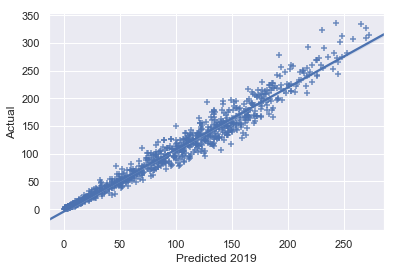

In [34]:

import seaborn as sns; sns.set(color_codes=True)
from matplotlib import pyplot as plt
from matplotlib import cm as cm

x, y = pd.Series(clf_pred_2019, name="Predicted 2019"), pd.Series(Target_2019, name="Actual")
ax = sns.regplot(x=x, y=y,marker="+")
plt.savefig("Images/model_perf2019.png")

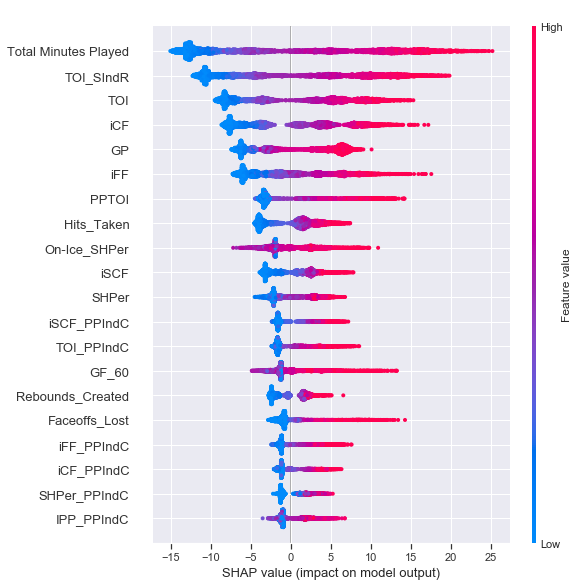

In [56]:
import shap
shap.initjs()
explainer= shap.TreeExplainer(clf)
shap_values = explainer.shap_values(player_data.iloc[:, 1:])
shap.summary_plot(shap_values, player_data.iloc[:, 1:])

This lines up fantastically well on the new data set, let's see how our teams did. 

### Team Performance

Who has the best team? who had the best predicted team? 

Important note, these projections are based on the players the teams drafted at the start of the season, not who they ended up with, so it's not necissarily the final call but it's close just the same. 

In [35]:
FantasyDraftResults = pd.read_csv('FantasyDraftResults.csv')

In [36]:
clf_pred_2019=pd.DataFrame(clf_pred_2019)
clf_pred_2019.columns = ['Modeled_Fantasy_Points']
new_player_data_2019.reset_index( inplace=True)
Pd_plus_2019 = pd.concat([player_data_2019,clf_pred_2019], axis=1)
Pd_plus_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Columns: 239 entries, Player to Modeled_Fantasy_Points
dtypes: float64(205), int64(25), object(9)
memory usage: 1.6+ MB


In [37]:
Pd_plus_2019 = pd.concat([player_data_2019,clf_pred_2019], axis=1)


In [38]:
 result = pd.merge(FantasyDraftResults, Pd_plus_2019, on='Player', how='left')

In [39]:
infs = np.where(np.isnan(result.Modeled_Fantasy_Points))
infs


(array([ 97, 182, 200]),)

Let's look at who didn't get a join and why.

In [40]:
FantasyDraftResults.iloc[97]

OverallDraftNumber                        231
DraftRound                                 20
FantasyTeam           Every Day I'm Byfuglien
Position                                    D
Player                       Michael Matheson
Year                                     2019
Team                                      FLA
Name: 97, dtype: object

In [41]:
FantasyDraftResults.iloc[182]

OverallDraftNumber                        229
DraftRound                                 20
FantasyTeam           Beet Beet Gourde Gourde
Position                                   LW
Player                         Patrick Maroon
Year                                     2019
Team                                      STL
Name: 182, dtype: object

In [42]:
FantasyDraftResults.iloc[200]

OverallDraftNumber                   57
DraftRound                            5
FantasyTeam           Davinci's McDavid
Position                              C
Player                     Mitch Marner
Year                               2019
Team                                TOR
Name: 200, dtype: object

In [43]:
Pd_plus_2019[Pd_plus_2019['Player'].str.contains('Maroon')]

,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,Shots,...,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,Cleaned_Position,Modeled_Fantasy_Points
687,Pat Maroon,2019,STL,L,74,890.7,8,8,45.71,93,...,75.0,225.0,2007.0,PHI,6.0,10.0,161.0,115.95,L,118.028535


In [44]:
Pd_plus_2019[Pd_plus_2019['Player'].str.contains('Marner')]

,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,Shots,...,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,Cleaned_Position,Modeled_Fantasy_Points
628,Mitchell Marner,2019,TOR,C,82,1212.566667,16,42,73.42,155,...,72.0,175.0,2015.0,TOR,1.0,4.0,4.0,241.05,C,225.673856


In [45]:
Pd_plus_2019[Pd_plus_2019['Player'].str.contains('Matheson')]

,Player,Year,Team,Position,GP,TOI,Goals,Total_Assists,IPP,Shots,...,Height_(in),Weight_(lbs),Draft_Year,Draft_Team,Draft_Round,Round_Pick,Overall_Draft_Position,Fantasy Points,Cleaned_Position,Modeled_Fantasy_Points
617,Mike Matheson,2019,FLA,D,75,1360.75,6,11,30.91,109,...,74.0,193.0,2012.0,FLA,1.0,23.0,23.0,146.8,D,142.173077


This is acutally a pretty common error and fewer players than I expected: essentially it's common changes of how ESPN records the names vs how the League has them saved. Still far fewer than I expected, and a quick manual find and replace fixes it.

In [46]:
FantasyDraftResults.replace('Patrick Maroon', 'Pat Maroon', inplace=True)
FantasyDraftResults.replace('Mitch Marner', 'Mitchell Marner', inplace=True)
FantasyDraftResults.replace('Michael Matheson', 'Mike Matheson', inplace=True)
result = pd.merge(FantasyDraftResults, Pd_plus_2019, on='Player', how='left')
infs = np.where(np.isnan(result.Modeled_Fantasy_Points))
infs

(array([], dtype=int64),)

In [51]:
## Creating Points Differential

result['Points Differential']=result['Fantasy Points']-result['Modeled_Fantasy_Points']

### OK BUT WHO WON?!?!

enough messing about, who had the best predicted results?!

In [52]:
result = result[['Player','FantasyTeam','OverallDraftNumber','DraftRound','Fantasy Points', "Modeled_Fantasy_Points", 'Points Differential']]

In [53]:
team_data = result[['FantasyTeam','Fantasy Points', "Modeled_Fantasy_Points",'Points Differential']]
team_data = team_data.groupby("FantasyTeam").sum()
team_data.sort_values(by='Fantasy Points', axis=0, ascending=False)

,Fantasy Points,Modeled_Fantasy_Points,Points Differential
FantasyTeam,,,
Gritty Gritty Bang Bang,4138.80,3666.829129,471.970871
Shat Deuces,4051.70,3524.522606,527.177394
Amesville Aliens,3802.20,3480.791629,321.408371
Beet Beet Gourde Gourde,3735.00,3449.976131,285.023869
Datsyuk's Dekes,3725.00,3513.065030,211.934970
Every Day I'm Byfuglien,3676.00,3249.621838,426.378162
Team Game Blouses,3617.75,3348.357182,269.392818
Tronhelm Black Bears,3544.60,3239.745033,304.854967
Paul North Kariya,3540.20,3310.135904,230.064096


So Team Gritty did the best, but how about if we look at the predictions? Well it turns out the mostly stayed in the same ranking. The only movement was that Datsyuk's Dekes rises up to third, but otherwise it's relatively in line.

In [54]:
team_data.sort_values(by='Modeled_Fantasy_Points', axis=0, ascending=False)

,Fantasy Points,Modeled_Fantasy_Points,Points Differential
FantasyTeam,,,
Gritty Gritty Bang Bang,4138.80,3666.829129,471.970871
Shat Deuces,4051.70,3524.522606,527.177394
Datsyuk's Dekes,3725.00,3513.065030,211.934970
Amesville Aliens,3802.20,3480.791629,321.408371
Beet Beet Gourde Gourde,3735.00,3449.976131,285.023869
Team Game Blouses,3617.75,3348.357182,269.392818
Paul North Kariya,3540.20,3310.135904,230.064096
Every Day I'm Byfuglien,3676.00,3249.621838,426.378162
Tronhelm Black Bears,3544.60,3239.745033,304.854967


In fact, if you look at it side by side this way it appears even more static:

| **Team**     | **Fantasy Points**       | **Modeled_Fantasy_Points**  | **Movement**  |
| ------------- |-------------:| -----:| -----:| 
| **Gritty Gritty Bang Bang**    |  1 | 1 | 0 | 
| **Shat Deuces**    |  2 | 2 | 0 |  
| **Amesville Aliens**    |  3 | 4 |  -1 |
| **Beet Beet Gourde Gourde**    |  4 | 5 |  -1 |
| **Datsyuk's Dekes**    |  5 | 3 | +2 | 
| **Every Day I'm Byfuglien**    | 6 | 8 | -2 |  
| **Team Game Blouses**    |  7 | 6 |  +1 |
| **Tronhelm Black Bears**    |  8 | 9 |  -1 |
| **Paul North Kariya**    |  9 | 7 | +2 | 
| **Davinci's McDavid**   |  10 | 10 | 0 |  
| **London Bacon Blades**   |  11 | 11 |  0 |
| **Takoma Park Holtbeasts**   |  12 | 12 |  0 |

Only 7 teams shifted, about half the league, and only 3 by more than one position. This isn't a huge surprise, but does speak to some accuracy since the margin in some of these was as slim as 4 points in the actual and 10 in the modeled, or less than 1/1000 of the top score. 

Let's look at some players who did well, namely who we were most off on and who we were closest with.

In [122]:
result["Points Differential"]= abs(result['Fantasy Points']-result['Modeled_Fantasy_Points'])

Closest margin:

In [128]:
result.sort_values(by='Points Differential', axis=0, ascending=True)[0:5]

,Player,FantasyTeam,OverallDraftNumber,DraftRound,Fantasy Points,Modeled_Fantasy_Points,Points Differential
188,Tyler Johnson,Paul North Kariya,161,14,168.80,168.768422,0.031578
62,Brandon Saad,London Bacon Blades,241,21,156.15,155.912980,0.237020
12,Oliver Ekman-Larsson,Datsyuk's Dekes,110,10,178.10,178.465323,0.365323
24,Sam Reinhart,Datsyuk's Dekes,179,15,188.00,187.524249,0.475751
231,Nikolaj Ehlers,Paul North Kariya,65,6,116.10,115.195717,0.904283


Furthest off:

In [199]:
result.sort_values(by='Points Differential', axis=0, ascending=False)[0:10]

,Player,FantasyTeam,OverallDraftNumber,DraftRound,Fantasy Points,Modeled_Fantasy_Points,Points Differential
187,Steven Stamkos,London Bacon Blades,25,3,323.30,226.866130,96.433870
197,Nikita Kucherov,Shat Deuces,7,1,336.25,243.808509,92.441491
15,Patrice Bergeron,Shat Deuces,66,6,277.40,195.138066,82.261934
190,Brayden Point,Gritty Gritty Bang Bang,70,6,291.80,218.874992,72.925008
88,Leon Draisaitl,Amesville Aliens,17,2,326.30,256.526650,69.773350
158,Sidney Crosby,London Bacon Blades,1,1,334.20,265.786189,68.413811
150,Mika Zibanejad,Takoma Park Holtbeasts,198,17,290.90,225.328694,65.571306
244,Alex Ovechkin,Gritty Gritty Bang Bang,3,1,311.80,251.208170,60.591830
99,Jonathan Huberdeau,Gritty Gritty Bang Bang,123,11,256.70,198.143893,58.556107
210,Alexander Edler,Paul North Kariya,152,13,195.10,137.848800,57.251200


What this shows me here is that the model over all does very well, especially at the mid point, and does poorly with the outliers. Those folks at the top are mostly the top oft the league as well, in almost that exact order: Kucherov, Stamkos, Draisaitl, Ovechkin. As Micah McCurdy said once in a talk, 'we can look at the outliers and laugh at them, because that is not where the math is'. 

Also, fun hockey trivia; many of those top players (Stamkos, Kucherov, Point) are on the best team in the league, who got swept in the first round of the playoffs that barely made it in. This data was all pulled two weeks prior, so I'd like to believe that these players simply regressed to where the model expected them. 

How about teams, who did we miss there? 

In [201]:
team_data.sort_values(by='Points Differential', axis=0, ascending=False)

,Fantasy Points,Modeled_Fantasy_Points,Points Differential
FantasyTeam,,,
Shat Deuces,4051.70,3517.404657,625.550648
Every Day I'm Byfuglien,3676.00,3260.820848,513.307011
Gritty Gritty Bang Bang,4138.80,3695.021269,488.432790
London Bacon Blades,3411.35,3050.087202,470.498736
Tronhelm Black Bears,3544.60,3252.795762,410.261159
Team Game Blouses,3617.75,3345.433101,403.597724
Takoma Park Holtbeasts,3263.70,2982.261218,403.335852
Davinci's McDavid,3457.35,3161.534241,364.359200
Amesville Aliens,3802.20,3473.238084,357.000023


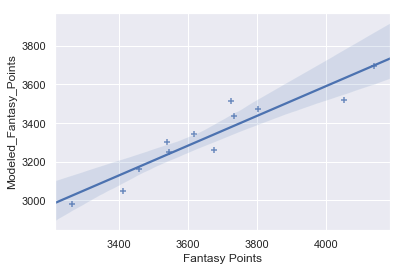

In [140]:
sns.regplot(x=team_data['Fantasy Points'], y=team_data['Modeled_Fantasy_Points'],marker="+")

On average, it seems I was off by about 10%, which is debatable if that's an acceptable range, but I still feel pretty proud of it. 

In [152]:
team_data['Points Differential']/team_data['Fantasy Points']

FantasyTeam
Amesville Aliens           0.093893
Beet Beet Gourde Gourde    0.093749
Datsyuk's Dekes            0.075295
Davinci's McDavid          0.105387
Every Day I'm Byfuglien    0.139637
Gritty Gritty Bang Bang    0.118013
London Bacon Blades        0.137922
Paul North Kariya          0.098884
Shat Deuces                0.154392
Takoma Park Holtbeasts     0.123582
Team Game Blouses          0.111560
Tronhelm Black Bears       0.115743
dtype: float64

In [145]:
sum(team_data['Points Differential']/team_data['Fantasy Points'])/12

0.1140046903841516

Some more points comparison, looking at who I was closest on and furthest off. 

Closest:

In [206]:
result.sort_values(by='Points Differential', axis=0, ascending=True)[0:20]

,Player,FantasyTeam,OverallDraftNumber,DraftRound,Fantasy Points,Modeled_Fantasy_Points,Points Differential
188,Tyler Johnson,Paul North Kariya,161,14,168.80,168.768422,0.031578
62,Brandon Saad,London Bacon Blades,241,21,156.15,155.912980,0.237020
12,Oliver Ekman-Larsson,Datsyuk's Dekes,110,10,178.10,178.465323,0.365323
24,Sam Reinhart,Datsyuk's Dekes,179,15,188.00,187.524249,0.475751
231,Nikolaj Ehlers,Paul North Kariya,65,6,116.10,115.195717,0.904283
178,Vince Dunn,Amesville Aliens,260,22,140.00,140.911229,0.911229
151,Claude Giroux,Paul North Kariya,20,2,244.05,242.828133,1.221867
169,Erik Karlsson,London Bacon Blades,13,2,153.70,152.325779,1.374221
86,Filip Zadina,Takoma Park Holtbeasts,246,21,10.30,8.860055,1.439945
8,Ondrej Kase,Datsyuk's Dekes,275,23,69.95,68.475555,1.474445


Mostly limited players who didn't have a lot of time. Highest:

In [204]:
result.sort_values(by='Points Differential', axis=0, ascending=False).iloc[0:20]

,Player,FantasyTeam,OverallDraftNumber,DraftRound,Fantasy Points,Modeled_Fantasy_Points,Points Differential
187,Steven Stamkos,London Bacon Blades,25,3,323.30,226.866130,96.433870
197,Nikita Kucherov,Shat Deuces,7,1,336.25,243.808509,92.441491
15,Patrice Bergeron,Shat Deuces,66,6,277.40,195.138066,82.261934
190,Brayden Point,Gritty Gritty Bang Bang,70,6,291.80,218.874992,72.925008
88,Leon Draisaitl,Amesville Aliens,17,2,326.30,256.526650,69.773350
158,Sidney Crosby,London Bacon Blades,1,1,334.20,265.786189,68.413811
150,Mika Zibanejad,Takoma Park Holtbeasts,198,17,290.90,225.328694,65.571306
244,Alex Ovechkin,Gritty Gritty Bang Bang,3,1,311.80,251.208170,60.591830
99,Jonathan Huberdeau,Gritty Gritty Bang Bang,123,11,256.70,198.143893,58.556107
210,Alexander Edler,Paul North Kariya,152,13,195.10,137.848800,57.251200


What I see here is that the model is slightly too conservative over all; of these top 20 with the highest error rates not a single one was the model higher than the actual score. In fact it happens only 53 times over more than 900 instances, or less than 6% of the time. I don't know that's a huge problem but might merit deeper analysis later.


In [215]:
result[result['Modeled_Fantasy_Points'] > result['Fantasy Points']].count()


Player                    53
FantasyTeam               53
OverallDraftNumber        53
DraftRound                53
Fantasy Points            53
Modeled_Fantasy_Points    53
Points Differential       53
dtype: int64

The following is strickly bragging rights, but I was interested in seeing who did the best in each round of the draft, so these are the teams and the best player for each round of the draft.  The Standout was Mika Zibanejad, who ended up at 11th over all but was drafted at number 198 by the Takoma Park Hotbeasts. 

Gritty Gritty Bang Bang won over all and also won five rounds of the draft. Interestingly London Bacon Blades managed to grab two of the top over all performers but still dropped off and managed to end at 11th in basically every metric. LBB was managed by a Brit who is a new NHL fan and only watched one season before this, so I think it speaks to the knowledge required to do well in these types of contests; you have to have the knowledge to pick well for 23 rounds, not just the first two. 

In [185]:
RoundOpts = result.loc[result.reset_index().groupby(['DraftRound'])['Fantasy Points'].idxmax()]
RoundOpts.iloc[:,]

,Player,FantasyTeam,OverallDraftNumber,DraftRound,Fantasy Points
197,Nikita Kucherov,Shat Deuces,7,1,336.25
88,Leon Draisaitl,Amesville Aliens,17,2,326.30
187,Steven Stamkos,London Bacon Blades,25,3,323.30
94,Aleksander Barkov,Amesville Aliens,44,4,306.25
224,Mark Scheifele,Paul North Kariya,56,5,274.95
190,Brayden Point,Gritty Gritty Bang Bang,70,6,291.80
70,Gabriel Landeskog,Tronhelm Black Bears,76,7,259.70
82,Dylan Larkin,Amesville Aliens,92,8,255.40
59,Jonathan Toews,Shat Deuces,103,9,272.10
131,Ryan Johansen,Every Day I'm Byfuglien,111,10,218.20


Interestingly, everyone won at least one round of the draft, which I think speaks somewhat to the parity of the skill in the league. 

In [218]:
RoundOpts.groupby('FantasyTeam')['DraftRound'].count().sort_values(ascending=False)

FantasyTeam
Gritty Gritty Bang Bang    5
Shat Deuces                3
Amesville Aliens           3
Tronhelm Black Bears       2
Team Game Blouses          2
Takoma Park Holtbeasts     2
Every Day I'm Byfuglien    2
Paul North Kariya          1
London Bacon Blades        1
Davinci's McDavid          1
Datsyuk's Dekes            1
Name: DraftRound, dtype: int64

In [186]:
## saving the result for posterity
result.to_csv("result.csv")

## Conclusion

After comparing this model to my final results, I am quite happy with how it did over all. Not only did it get the league results on the nose I feel it did well at predicting the players, despite being somewhat conservative. 

I think some interesting future work would be making this forward looking to make actual forecasts instead of models, but over all I'm quite happy with how this did in my league and with this project over all. 